## TASK 2 : Santral Üretim Tahmini

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
df = pd.read_excel('powerplant_data.xlsx', index_col=0)

In [38]:
df.head()

,instrument,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
0,2020-01-01 00:00:00.000000,0.640,0.000,0.045376,0.026701,0.021143,0.036322,0.020318,0.000
1,2020-01-01 00:59:59.999999,0.650,0.000,0.041271,0.016510,0.034583,0.028692,0.038147,0.000
2,2020-01-01 02:00:00.000001,0.635,0.325,0.039892,0.520764,0.554837,0.651030,0.138745,0.000
3,2020-01-01 03:00:00.000000,0.515,0.000,0.039533,0.040981,0.028857,0.017618,0.030898,0.325
4,2020-01-01 03:59:59.999999,0.450,0.000,0.030361,0.035847,0.024929,0.035401,0.036201,0.000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8776 entries, 0 to 8775
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   instrument                        8776 non-null   datetime64[ns]
 1   forecast_t-75m_value              8776 non-null   float64       
 2   generation_meteredby_device_t-0h  8776 non-null   float64       
 3   powerplantdata_t-0h_part0         8776 non-null   float64       
 4   powerplantdata_t-0h_part1         8776 non-null   float64       
 5   powerplantdata_t-0h_part2         8776 non-null   float64       
 6   powerplantdata_t-0h_part3         8776 non-null   float64       
 7   powerplantdata_t-0h_part4         8776 non-null   float64       
 8   generation_meteredby_device_t-1h  8776 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 685.6 KB


In [40]:
df.describe()

,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
count,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000
mean,14.663482,14.572158,14.488336,14.508861,14.518485,14.494598,14.507855,14.569554
std,12.787253,13.641425,13.713459,13.717060,13.714080,13.697697,13.716914,13.642056
min,0.050000,-0.130000,-0.177300,-0.158119,-0.164185,-0.149254,-1.256736,-0.130000
25%,2.145000,1.480000,1.373237,1.402131,1.428789,1.398758,1.384714,1.478750
50%,11.207500,10.202500,10.004761,10.056867,10.043475,9.962483,9.952808,10.197500
75%,26.831250,27.641250,27.500932,27.660097,27.650077,27.744701,27.851845,27.641250
max,38.230000,38.715000,38.829799,38.794637,38.772266,38.780023,38.775430,38.715000


<AxesSubplot:>

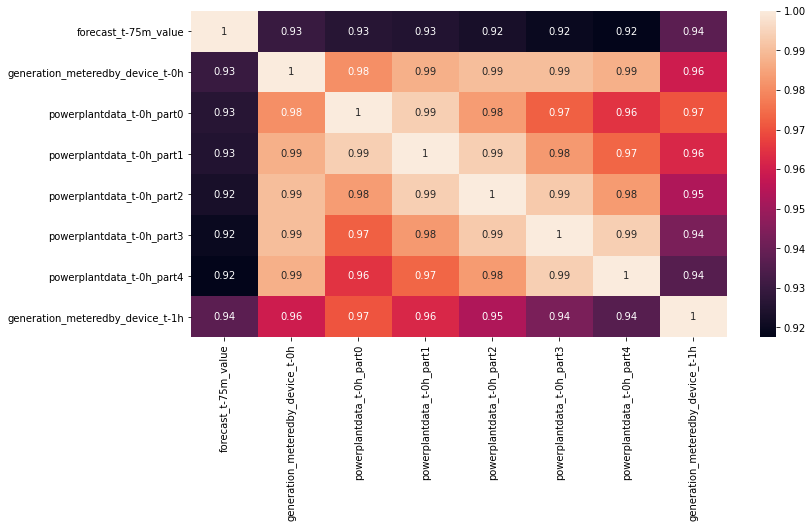

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [42]:
df[(df['instrument'] >= '2020-10-01') & (df['instrument'] < '2021-01-01')]

,instrument,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
6567,2020-10-01 00:00:00.000000,0.625,0.115,-0.064147,-0.003054,0.159694,0.298086,0.136832,0.025
6568,2020-10-01 00:59:59.999999,0.610,0.090,0.291903,0.063694,-0.085682,-0.125032,0.001089,0.115
6569,2020-10-01 02:00:00.000001,0.960,0.065,0.214622,-0.056262,-0.107350,-0.128895,0.041804,0.090
6570,2020-10-01 03:00:00.000000,1.385,0.475,0.377538,0.600864,0.321710,0.420797,0.524851,0.065
6571,2020-10-01 03:59:59.999999,1.010,0.235,0.637593,0.418802,0.344800,0.231238,0.041793,0.475
...,...,...,...,...,...,...,...,...,...
8770,2020-12-31 18:59:59.999999,33.635,35.555,36.488404,35.970513,34.776159,34.327873,35.997701,35.885
8771,2020-12-31 20:00:00.000001,34.065,36.495,34.518909,35.868938,36.682375,37.195969,37.336583,35.555
8772,2020-12-31 21:00:00.000000,34.250,37.005,37.030349,37.158400,37.235866,36.988668,36.867310,36.495
8773,2020-12-31 21:59:59.999999,33.080,36.935,36.962253,36.831921,37.266634,38.518692,36.990068,37.005


* Santraller üretim tahmin değelerini ilgili t anının en geç 1 saat öncesine kadar ilgili kurumlara bildirmek zorunda oldukları için tarihlerde kaydırma yaptık.

In [43]:
df2 = df[df['instrument'] > '2020-10-01 00:00']
df2

,instrument,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
6568,2020-10-01 00:59:59.999999,0.610,0.090,0.291903,0.063694,-0.085682,-0.125032,0.001089,0.115
6569,2020-10-01 02:00:00.000001,0.960,0.065,0.214622,-0.056262,-0.107350,-0.128895,0.041804,0.090
6570,2020-10-01 03:00:00.000000,1.385,0.475,0.377538,0.600864,0.321710,0.420797,0.524851,0.065
6571,2020-10-01 03:59:59.999999,1.010,0.235,0.637593,0.418802,0.344800,0.231238,0.041793,0.475
6572,2020-10-01 05:00:00.000001,0.850,-0.085,0.010968,-0.100099,-0.107280,-0.103607,-0.103692,0.235
...,...,...,...,...,...,...,...,...,...
8771,2020-12-31 20:00:00.000001,34.065,36.495,34.518909,35.868938,36.682375,37.195969,37.336583,35.555
8772,2020-12-31 21:00:00.000000,34.250,37.005,37.030349,37.158400,37.235866,36.988668,36.867310,36.495
8773,2020-12-31 21:59:59.999999,33.080,36.935,36.962253,36.831921,37.266634,38.518692,36.990068,37.005
8774,2020-12-31 23:00:00.000001,28.855,29.880,33.615321,32.713004,27.669085,27.850444,30.385332,36.935


In [44]:
df2 = df2.drop(['generation_meteredby_device_t-0h','generation_meteredby_device_t-1h'], axis=1)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 6568 to 8775
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   instrument                 2208 non-null   datetime64[ns]
 1   forecast_t-75m_value       2208 non-null   float64       
 2   powerplantdata_t-0h_part0  2208 non-null   float64       
 3   powerplantdata_t-0h_part1  2208 non-null   float64       
 4   powerplantdata_t-0h_part2  2208 non-null   float64       
 5   powerplantdata_t-0h_part3  2208 non-null   float64       
 6   powerplantdata_t-0h_part4  2208 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.0 KB


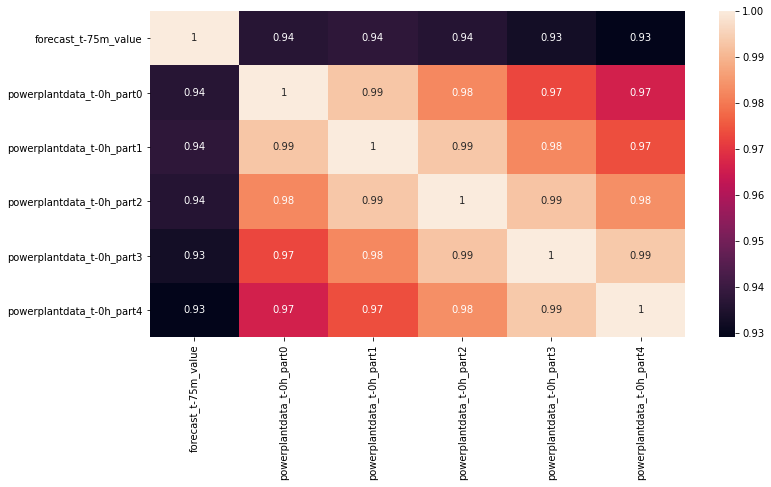

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(),annot=True)
plt.show()

<Figure size 720x432 with 0 Axes>

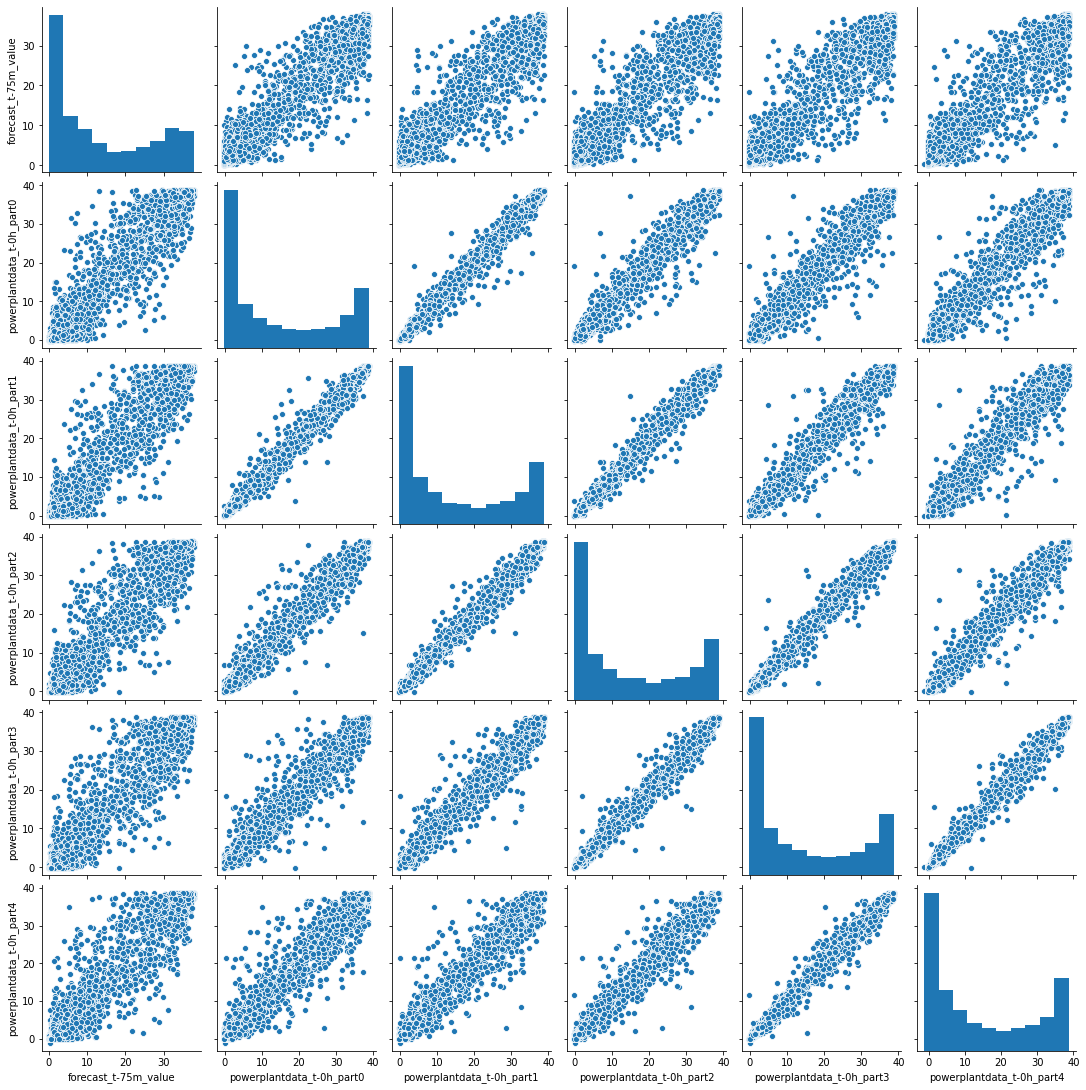

In [47]:
plt.figure(figsize=(10,6))
sns.pairplot(df2)
plt.show()

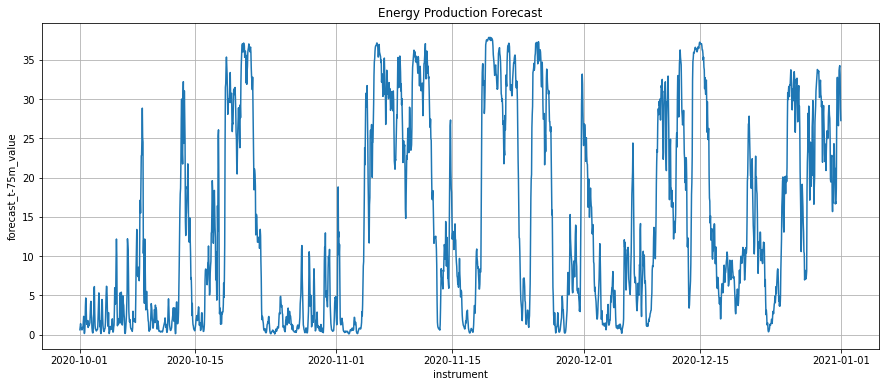

In [48]:
plt.figure(figsize=(15,6))
sns.lineplot(x="instrument", y="forecast_t-75m_value", data=df2, err_style=None)
plt.grid(True)
plt.title("Energy Production Forecast")
plt.show()

In [49]:
df2 = df2.set_index("instrument")
df2 = df2.rename(columns={"forecast_t-75m_value": "forecast_75m"})
df2.head()

,forecast_75m,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,,
2020-10-01 00:59:59.999999,0.610,0.291903,0.063694,-0.085682,-0.125032,0.001089
2020-10-01 02:00:00.000001,0.960,0.214622,-0.056262,-0.107350,-0.128895,0.041804
2020-10-01 03:00:00.000000,1.385,0.377538,0.600864,0.321710,0.420797,0.524851
2020-10-01 03:59:59.999999,1.010,0.637593,0.418802,0.344800,0.231238,0.041793
2020-10-01 05:00:00.000001,0.850,0.010968,-0.100099,-0.107280,-0.103607,-0.103692


In [50]:
train_size = int(len(df2) * 0.9)
test_size = len(df2) - train_size
train, test = df2.iloc[0:train_size], df2.iloc[train_size:len(df2)]
print(len(train), len(test))

1987 221


In [51]:
train

,forecast_75m,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,,
2020-10-01 00:59:59.999999,0.610,0.291903,0.063694,-0.085682,-0.125032,0.001089
2020-10-01 02:00:00.000001,0.960,0.214622,-0.056262,-0.107350,-0.128895,0.041804
2020-10-01 03:00:00.000000,1.385,0.377538,0.600864,0.321710,0.420797,0.524851
2020-10-01 03:59:59.999999,1.010,0.637593,0.418802,0.344800,0.231238,0.041793
2020-10-01 05:00:00.000001,0.850,0.010968,-0.100099,-0.107280,-0.103607,-0.103692
...,...,...,...,...,...,...
2020-12-22 15:00:00.000000,11.050,8.526615,7.016083,9.012336,17.334515,16.615706
2020-12-22 15:59:59.999999,11.770,6.956144,9.298531,10.388896,11.944166,11.409145
2020-12-22 17:00:00.000001,11.240,9.492941,8.089081,7.543027,7.056739,7.934660


In [52]:
test

,forecast_75m,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,,
2020-12-22 20:00:00.000001,6.120,10.005491,10.497492,9.209504,7.777069,5.926547
2020-12-22 21:00:00.000000,7.005,5.986031,6.066487,5.878140,5.894146,7.276927
2020-12-22 21:59:59.999999,4.310,9.118048,7.965260,7.262827,6.655313,5.563890
2020-12-22 23:00:00.000001,2.530,4.086720,2.843456,2.261741,1.161892,1.078670
2020-12-23 00:00:00.000000,3.090,1.252649,1.839828,2.830287,2.977969,2.239010
...,...,...,...,...,...,...
2020-12-31 20:00:00.000001,34.065,34.518909,35.868938,36.682375,37.195969,37.336583
2020-12-31 21:00:00.000000,34.250,37.030349,37.158400,37.235866,36.988668,36.867310
2020-12-31 21:59:59.999999,33.080,36.962253,36.831921,37.266634,38.518692,36.990068


In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
df2.columns

Index(['forecast_75m', 'powerplantdata_t-0h_part0',
       'powerplantdata_t-0h_part1', 'powerplantdata_t-0h_part2',
       'powerplantdata_t-0h_part3', 'powerplantdata_t-0h_part4'],
      dtype='object')

In [55]:
columns = ['forecast_75m', 'powerplantdata_t-0h_part0',
       'powerplantdata_t-0h_part1', 'powerplantdata_t-0h_part2',
       'powerplantdata_t-0h_part3', 'powerplantdata_t-0h_part4']

In [56]:
scaler = RobustScaler()

In [57]:
train.loc[:, columns] = scaler.fit_transform(train[columns].to_numpy())

In [58]:
test.loc[:, columns] = scaler.transform(test[columns].to_numpy())

In [59]:
train

,forecast_75m,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,,
2020-10-01 00:59:59.999999,-0.327464,-0.273614,-0.278585,-0.291789,-0.300663,-0.286454
2020-10-01 02:00:00.000001,-0.312704,-0.276533,-0.283062,-0.292608,-0.300810,-0.284935
2020-10-01 03:00:00.000000,-0.294781,-0.270380,-0.258535,-0.276400,-0.279863,-0.266916
2020-10-01 03:59:59.999999,-0.310596,-0.260558,-0.265331,-0.275528,-0.287087,-0.284935
2020-10-01 05:00:00.000001,-0.317343,-0.284224,-0.284698,-0.292605,-0.299847,-0.290363
...,...,...,...,...,...,...
2020-12-22 15:00:00.000000,0.112810,0.037387,-0.019091,0.051880,0.364667,0.333328
2020-12-22 15:59:59.999999,0.143173,-0.021925,0.066100,0.103878,0.159257,0.139105
2020-12-22 17:00:00.000001,0.120822,0.073882,0.020958,-0.003622,-0.026988,0.009495


In [60]:
test

,forecast_75m,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,,
2020-12-22 20:00:00.000001,-0.095098,0.093240,0.110850,0.059328,0.000462,-0.065414
2020-12-22 21:00:00.000000,-0.057775,-0.058563,-0.054534,-0.066511,-0.071291,-0.015040
2020-12-22 21:59:59.999999,-0.171429,0.059724,0.016336,-0.014206,-0.042285,-0.078943
2020-12-22 23:00:00.000001,-0.246494,-0.130295,-0.174832,-0.203117,-0.251622,-0.246256
2020-12-23 00:00:00.000000,-0.222878,-0.237329,-0.212292,-0.181641,-0.182417,-0.202972
...,...,...,...,...,...,...
2020-12-31 20:00:00.000001,1.083395,1.019040,1.057823,1.097089,1.121526,1.106286
2020-12-31 21:00:00.000000,1.091197,1.113890,1.105952,1.117997,1.113626,1.088781
2020-12-31 21:59:59.999999,1.041856,1.111318,1.093766,1.119159,1.171931,1.093360


In [61]:
def create_dataset(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [62]:
df2.columns

Index(['forecast_75m', 'powerplantdata_t-0h_part0',
       'powerplantdata_t-0h_part1', 'powerplantdata_t-0h_part2',
       'powerplantdata_t-0h_part3', 'powerplantdata_t-0h_part4'],
      dtype='object')

In [63]:
time_steps = 7

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.forecast_75m, time_steps)
X_test, y_test = create_dataset(test, test.forecast_75m, time_steps)

print(X_train.shape, y_train.shape)

(1980, 7, 6) (1980,)


In [64]:
X_train.shape[1]

7

In [65]:
X_train.shape[2]

6

In [66]:
import tensorflow as tf
from tensorflow import keras

In [67]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [68]:
history = model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Train on 1782 samples, validate on 198 samples
Epoch 1/200
1782/1782 [==============================] - 5s 3ms/sample - loss: 0.0373 - val_loss: 0.0233
Epoch 2/200
1782/1782 [==============================] - 1s 591us/sample - loss: 0.0521 - val_loss: 0.0310
Epoch 3/200
1782/1782 [==============================] - 1s 697us/sample - loss: 0.0200 - val_loss: 0.0140
Epoch 4/200
1782/1782 [==============================] - 1s 727us/sample - loss: 0.0164 - val_loss: 0.0117
Epoch 5/200
1782/1782 [==============================] - 1s 672us/sample - loss: 0.0149 - val_loss: 0.0103
Epoch 6/200
1782/1782 [==============================] - 1s 631us/sample - loss: 0.0262 - val_loss: 0.0262
Epoch 7/200
1782/1782 [==============================] - 1s 683us/sample - loss: 0.0155 - val_loss: 0.0112
Epoch 8/200
1782/1782 [==============================] - 1s 641us/sample - loss: 0.0136 - val_loss: 0.0101
Epoch 9/200
1782/1782 [==============================] - 1s 623us/sample - loss: 0.0129 - val_loss:

1782/1782 [==============================] - 1s 664us/sample - loss: 0.0041 - val_loss: 0.0028
Epoch 77/200
1782/1782 [==============================] - 1s 687us/sample - loss: 0.0039 - val_loss: 0.0023
Epoch 78/200
1782/1782 [==============================] - 1s 762us/sample - loss: 0.0052 - val_loss: 0.0036
Epoch 79/200
1782/1782 [==============================] - 1s 603us/sample - loss: 0.0051 - val_loss: 0.0036
Epoch 80/200
1782/1782 [==============================] - 1s 619us/sample - loss: 0.0052 - val_loss: 0.0037
Epoch 81/200
1782/1782 [==============================] - 1s 645us/sample - loss: 0.0042 - val_loss: 0.0030
Epoch 82/200
1782/1782 [==============================] - 1s 616us/sample - loss: 0.0037 - val_loss: 0.0024
Epoch 83/200
1782/1782 [==============================] - 1s 726us/sample - loss: 0.0038 - val_loss: 0.0029
Epoch 84/200
1782/1782 [==============================] - 1s 829us/sample - loss: 0.0034 - val_loss: 0.0021
Epoch 85/200
1782/1782 [=================

1782/1782 [==============================] - 1s 624us/sample - loss: 0.0037 - val_loss: 0.0025
Epoch 152/200
1782/1782 [==============================] - 1s 596us/sample - loss: 0.0035 - val_loss: 0.0026
Epoch 153/200
1782/1782 [==============================] - 1s 587us/sample - loss: 0.0031 - val_loss: 0.0022
Epoch 154/200
1782/1782 [==============================] - 1s 591us/sample - loss: 0.0032 - val_loss: 0.0022
Epoch 155/200
1782/1782 [==============================] - 1s 594us/sample - loss: 0.0029 - val_loss: 0.0021
Epoch 156/200
1782/1782 [==============================] - 1s 628us/sample - loss: 0.0029 - val_loss: 0.0019
Epoch 157/200
1782/1782 [==============================] - 1s 615us/sample - loss: 0.0029 - val_loss: 0.0018
Epoch 158/200
1782/1782 [==============================] - 1s 586us/sample - loss: 0.0029 - val_loss: 0.0021
Epoch 159/200
1782/1782 [==============================] - 1s 617us/sample - loss: 0.0028 - val_loss: 0.0018
Epoch 160/200
1782/1782 [========

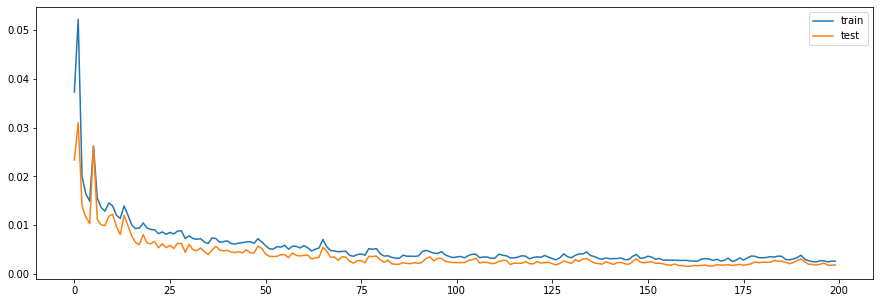

In [69]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [70]:
y_pred = model.predict(X_test)

In [71]:
y_pred

array([[-0.282605  ],
       [-0.27558863],
       [-0.3036066 ],
       [-0.35030445],
       [-0.31694195],
       [-0.32412195],
       [-0.31812245],
       [-0.31242523],
       [-0.28280324],
       [-0.28526118],
       [-0.283671  ],
       [-0.28265047],
       [-0.27762076],
       [-0.2650212 ],
       [-0.26782164],
       [-0.29469025],
       [-0.25182253],
       [-0.20237094],
       [-0.23314768],
       [-0.23810637],
       [-0.21325025],
       [-0.2068288 ],
       [-0.1414713 ],
       [-0.1872268 ],
       [-0.19683194],
       [-0.105725  ],
       [-0.1067177 ],
       [-0.1353986 ],
       [-0.10610259],
       [-0.03601537],
       [ 0.02369141],
       [ 0.03454483],
       [-0.10116027],
       [-0.16884214],
       [-0.1326634 ],
       [-0.16496736],
       [-0.20590183],
       [-0.19007492],
       [-0.23705369],
       [-0.08515031],
       [ 0.115904  ],
       [ 0.10593332],
       [ 0.24047804],
       [ 0.36036217],
       [ 0.4520451 ],
       [ 0

In [72]:
y_test

array([-2.93094360e-01, -2.90985767e-01, -3.29573010e-01, -3.38218239e-01,
       -3.37585662e-01, -3.29362151e-01, -3.23668951e-01, -3.05113337e-01,
       -2.97311545e-01, -3.03426463e-01, -2.94570374e-01, -2.90985767e-01,
       -2.71164997e-01, -2.74117027e-01, -2.93516078e-01, -2.64206642e-01,
       -2.29836584e-01, -2.27727992e-01, -2.40801265e-01, -2.16763310e-01,
       -1.89773326e-01, -1.82182393e-01, -1.45703743e-01, -1.81971534e-01,
       -1.53505535e-01, -9.61518187e-02, -1.33473906e-01, -9.19346336e-02,
       -4.76541908e-02, -1.09646811e-02, -4.21718503e-04, -1.68687401e-02,
       -8.28676858e-02, -1.75013179e-01, -1.45282024e-01, -1.99894570e-01,
       -1.75013179e-01, -1.99894570e-01, -1.52029520e-01, -1.15972588e-02,
        7.90722193e-02,  1.59620453e-01,  3.33790195e-01,  3.87348445e-01,
        4.70216131e-01,  4.92988930e-01,  3.20506062e-01,  2.26884555e-01,
        1.97153400e-01,  3.24723247e-01,  4.94464945e-01,  4.93410648e-01,
        4.52293094e-01,  

In [73]:
df2.columns

Index(['forecast_75m', 'powerplantdata_t-0h_part0',
       'powerplantdata_t-0h_part1', 'powerplantdata_t-0h_part2',
       'powerplantdata_t-0h_part3', 'powerplantdata_t-0h_part4'],
      dtype='object')

In [74]:
forecast_75m_transformer = RobustScaler()

In [75]:
forecast_75m_transformer = forecast_75m_transformer.fit(train[['forecast_75m']])

In [76]:
train[['forecast_75m']]

,forecast_75m
instrument,
2020-10-01 00:59:59.999999,-0.327464
2020-10-01 02:00:00.000001,-0.312704
2020-10-01 03:00:00.000000,-0.294781
2020-10-01 03:59:59.999999,-0.310596
2020-10-01 05:00:00.000001,-0.317343
...,...
2020-12-22 15:00:00.000000,0.112810
2020-12-22 15:59:59.999999,0.143173
2020-12-22 17:00:00.000001,0.120822


In [77]:
y_train_inv = forecast_75m_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = forecast_75m_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = forecast_75m_transformer.inverse_transform(y_pred)

In [78]:
y_test_inv

array([[-2.93094360e-01, -2.90985767e-01, -3.29573010e-01,
        -3.38218239e-01, -3.37585662e-01, -3.29362151e-01,
        -3.23668951e-01, -3.05113337e-01, -2.97311545e-01,
        -3.03426463e-01, -2.94570374e-01, -2.90985767e-01,
        -2.71164997e-01, -2.74117027e-01, -2.93516078e-01,
        -2.64206642e-01, -2.29836584e-01, -2.27727992e-01,
        -2.40801265e-01, -2.16763310e-01, -1.89773326e-01,
        -1.82182393e-01, -1.45703743e-01, -1.81971534e-01,
        -1.53505535e-01, -9.61518187e-02, -1.33473906e-01,
        -9.19346336e-02, -4.76541908e-02, -1.09646811e-02,
        -4.21718503e-04, -1.68687401e-02, -8.28676858e-02,
        -1.75013179e-01, -1.45282024e-01, -1.99894570e-01,
        -1.75013179e-01, -1.99894570e-01, -1.52029520e-01,
        -1.15972588e-02,  7.90722193e-02,  1.59620453e-01,
         3.33790195e-01,  3.87348445e-01,  4.70216131e-01,
         4.92988930e-01,  3.20506062e-01,  2.26884555e-01,
         1.97153400e-01,  3.24723247e-01,  4.94464945e-0

In [79]:
y_pred_inv

array([[-0.282605  ],
       [-0.27558863],
       [-0.3036066 ],
       [-0.35030445],
       [-0.31694195],
       [-0.32412195],
       [-0.31812245],
       [-0.31242523],
       [-0.28280324],
       [-0.28526118],
       [-0.283671  ],
       [-0.28265047],
       [-0.27762076],
       [-0.2650212 ],
       [-0.26782164],
       [-0.29469025],
       [-0.25182253],
       [-0.20237094],
       [-0.23314768],
       [-0.23810637],
       [-0.21325025],
       [-0.2068288 ],
       [-0.1414713 ],
       [-0.1872268 ],
       [-0.19683194],
       [-0.105725  ],
       [-0.1067177 ],
       [-0.1353986 ],
       [-0.10610259],
       [-0.03601537],
       [ 0.02369141],
       [ 0.03454483],
       [-0.10116027],
       [-0.16884214],
       [-0.1326634 ],
       [-0.16496736],
       [-0.20590183],
       [-0.19007492],
       [-0.23705369],
       [-0.08515031],
       [ 0.115904  ],
       [ 0.10593332],
       [ 0.24047804],
       [ 0.36036217],
       [ 0.4520451 ],
       [ 0

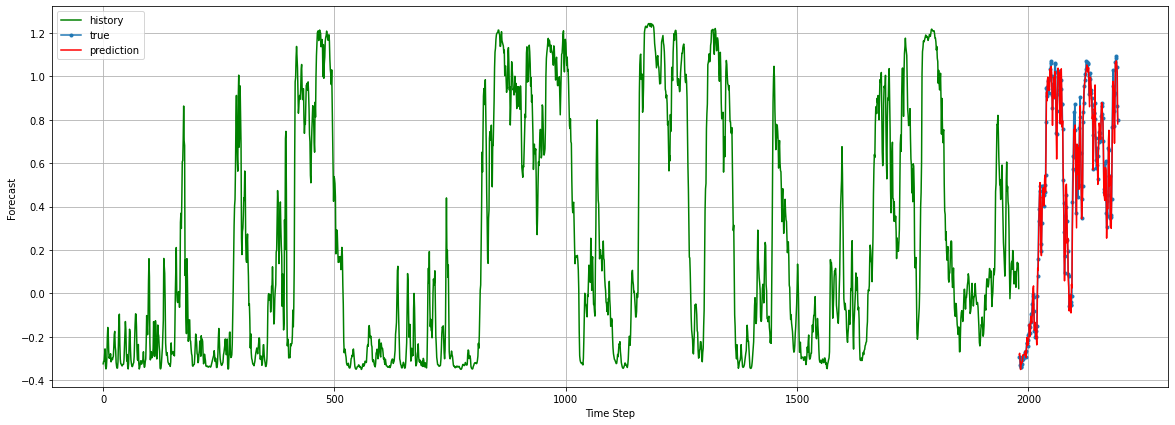

In [80]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Forecast')
plt.xlabel('Time Step')
plt.legend()
plt.grid()
plt.show();

In [81]:
y_test_inv.flatten().shape

(214,)

In [82]:
y_test_inv.shape

(1, 214)

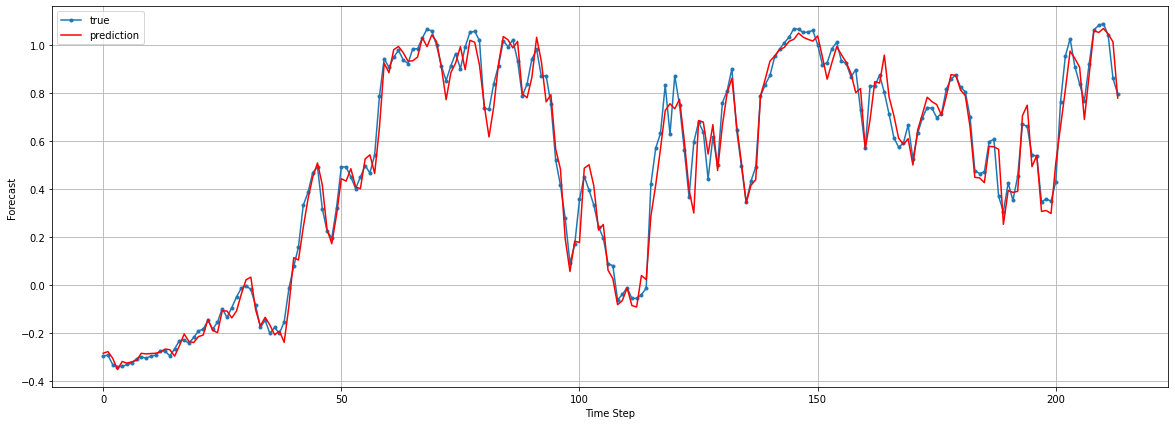

In [83]:
plt.figure(figsize=(20,7))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Forecast')
plt.xlabel('Time Step')
plt.legend()
plt.grid()
plt.show();

In [84]:
new_test= df2.iloc[train_size+7:len(df2)] # We clipped the first seven rows of the test data frame because it doesn't match

In [85]:
new_test["actaul"]=y_test_inv.flatten()

In [86]:
new_test["pred"] = y_pred_inv.flatten()

In [87]:
new_test.head()

,forecast_75m,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,actaul,pred
instrument,,,,,,,,
2020-12-23 03:00:00.000000,-0.293094,-0.283271,-0.283713,-0.291521,-0.298628,-0.288873,-0.293094,-0.282605
2020-12-23 03:59:59.999999,-0.290986,-0.289085,-0.285239,-0.292308,-0.299655,-0.291161,-0.290986,-0.275589
2020-12-23 05:00:00.000001,-0.329573,-0.288626,-0.284914,-0.292539,-0.299918,-0.290447,-0.329573,-0.303607
2020-12-23 06:00:00.000000,-0.338218,-0.288639,-0.284910,-0.292558,-0.299923,-0.290431,-0.338218,-0.350304
2020-12-23 06:59:59.999999,-0.337586,-0.288891,-0.280352,-0.290702,-0.300419,-0.290462,-0.337586,-0.316942


In [88]:
new_test[['forecast_75m','pred']]

,forecast_75m,pred
instrument,,
2020-12-23 03:00:00.000000,-0.293094,-0.282605
2020-12-23 03:59:59.999999,-0.290986,-0.275589
2020-12-23 05:00:00.000001,-0.329573,-0.303607
2020-12-23 06:00:00.000000,-0.338218,-0.350304
2020-12-23 06:59:59.999999,-0.337586,-0.316942
...,...,...
2020-12-31 20:00:00.000001,1.083395,1.053965
2020-12-31 21:00:00.000000,1.091197,1.070710
2020-12-31 21:59:59.999999,1.041856,1.048021


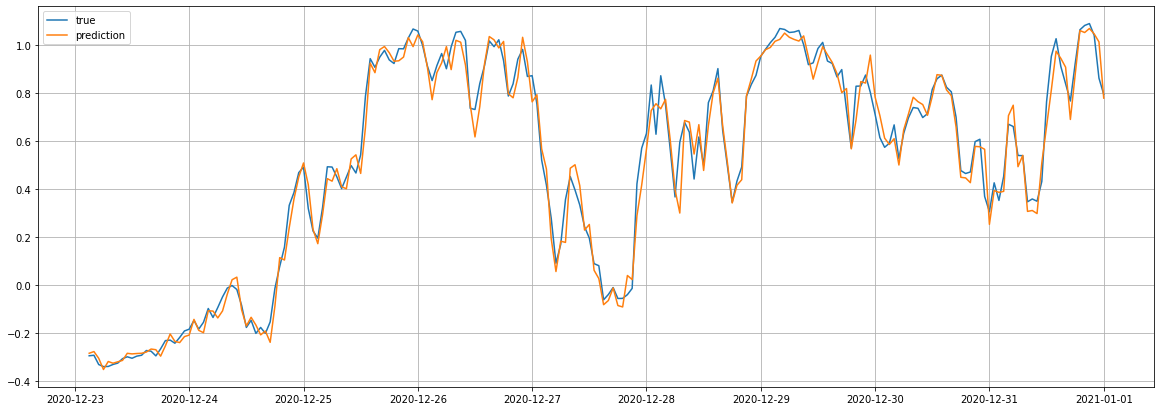

In [89]:
plt.figure(figsize=(20,7))
plt.plot(new_test['actaul'],label='true')
plt.plot(new_test['pred'],label='prediction')
plt.legend()
plt.grid()
plt.show();

In [99]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [100]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.043818037884091304
MSE:  0.003589006108249495
RMSE:  0.059908314183003804


In [101]:
mse = keras.metrics.MeanSquaredError()
mse.update_state(y_test, y_pred)
mse.result().numpy()

0.0035890057

In [102]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 Score:  0.9811653245490815
MAE:  0.043818037884091304
